# Lab 2
Prepared:
 - **Szymon Budziak**
 - **Krzysztof Gwiazda**

In [1]:
from PIL import Image
import numpy as np
import os

# Data preprocessing

### 1. Choose images from Plantdoc set

We have selected 3 tomato diseases:
- Tomato leaf bacterial spot
- Tomato leaf late blight
- Tomato leaf mosaic virus

### 2. Load images

In [2]:
full_path = f"{os.path.abspath('')}/Data"

In [3]:
files = [f"{full_path}/{filename}" for filename in os.listdir(full_path)]

In [4]:
images = [np.array(Image.open(file)) for file in files]

### 3. Scale images to 224x224x3 resolution

In [5]:
new_size = (224, 224, 3)
scaled_images = [np.resize(img, new_size) for img in images]
scaled_images[0].shape

(224, 224, 3)

### 4. Convert images to greyscale

In [6]:
greyscale_images = [np.array(Image.fromarray(img).convert('L')) for img in scaled_images]
greyscale_images[0].shape

(224, 224)

### 5. Convert images to 1D vector

In [7]:
vector_images = [img.ravel() for img in greyscale_images]
vector_images[0].shape

(50176,)

### 6. Standardize images

In [8]:
images_means = np.mean(vector_images, axis=1)
eps = 1e-6
images_stds = np.std(vector_images, axis=1) + eps

In [9]:
standardized_images = (vector_images - images_means[:, np.newaxis]) / images_stds[:, np.newaxis]
standardized_images.shape

(246, 50176)

# Principal component analysis (PCA)

In [10]:
from sklearn.decomposition import PCA

### 1. Perform PCA

In [11]:
pca = PCA(n_components=100)

In [12]:
principal_components = pca.fit_transform(standardized_images)

### 2. Covariance matrices before PCA and after

In [13]:
smaller_standardized_images = standardized_images[:, :25000]
# standardized_images has to many columns to perform np.cov so we are selecting first 25000
cov_matrix_before = np.cov(smaller_standardized_images.T)
cov_matrix_before

array([[ 1.70050506,  1.5276308 ,  1.53990535, ..., -0.11947015,
        -0.11195367, -0.11376048],
       [ 1.5276308 ,  1.5225897 ,  1.53477837, ..., -0.11420287,
        -0.10913924, -0.09934333],
       [ 1.53990535,  1.53477837,  1.56861223, ..., -0.1154405 ,
        -0.10863492, -0.09916062],
       ...,
       [-0.11947015, -0.11420287, -0.1154405 , ...,  0.88611718,
         0.83736034,  0.79388687],
       [-0.11195367, -0.10913924, -0.10863492, ...,  0.83736034,
         0.8536261 ,  0.83401672],
       [-0.11376048, -0.09934333, -0.09916062, ...,  0.79388687,
         0.83401672,  0.88339504]])

In [14]:
cov_matrix_after = np.cov(principal_components.T)
cov_matrix_after

array([[ 1.70549119e+03,  7.56275461e-14, -2.94902507e-14, ...,
        -1.12548906e-14,  5.29021979e-14, -1.28949568e-14],
       [ 7.56275461e-14,  9.52836875e+02,  8.35785593e-14, ...,
         5.17246236e-16, -2.76012217e-14,  1.62285435e-14],
       [-2.94902507e-14,  8.35785593e-14,  8.67192477e+02, ...,
        -9.28482399e-15,  3.03288720e-14,  1.24875050e-14],
       ...,
       [-1.12548906e-14,  5.17246236e-16, -9.28482399e-15, ...,
         1.79007608e+02, -6.01877749e-14,  4.01201227e-14],
       [ 5.29021979e-14, -2.76012217e-14,  3.03288720e-14, ...,
        -6.01877749e-14,  1.78728133e+02, -3.66525517e-14],
       [-1.28949568e-14,  1.62285435e-14,  1.24875050e-14, ...,
         4.01201227e-14, -3.66525517e-14,  1.76962689e+02]])

### 3. Average photo we subtracted from the others to standardize images

In [15]:
images_means

array([143.73686623, 100.88711735, 142.92717634, 137.9725566 ,
       124.55873326, 196.72498804, 179.32876276,   1.        ,
       121.92647879, 139.331533  , 156.22317443, 142.81841916,
        71.96231266, 140.65676818, 132.4771604 ,  82.09239477,
       103.0683793 ,  64.0811942 , 133.69062899,  94.84237484,
       122.33514031, 103.76909279, 127.70340402, 178.57680963,
        71.84131856,  92.04041773,  52.873864  , 160.12818878,
       114.38492506, 117.52104592, 119.55773677, 124.59492586,
       113.96406649, 163.40601084, 133.78912229, 129.44915896,
       103.05727838, 139.34444754, 110.00986527, 126.25099649,
       135.20208865,  85.03862404,  59.75556043, 100.04542012,
       108.11073023, 120.58641582, 114.49621333, 245.85564812,
       124.29721381,  70.06234056, 104.41639429,  74.44993622,
       116.01379145, 125.86029177,  88.69260204,  90.68753986,
        71.63849251,   9.23604911, 196.81780134, 168.16196987,
        65.7797154 , 115.87637516, 112.91422194,  99.44

### 4. Present principal components and principal components sorted by related variance

In [16]:
principal_components

array([[ -49.40379607,   -2.74471267,   40.51692202, ...,    3.06027408,
          -4.14000749,   -1.18358582],
       [ -19.63760145,  -73.95379214,  103.30365735, ...,  -16.37009592,
           9.16246144,    6.13713109],
       [  15.79195224, -109.4147882 ,  -91.50212034, ...,  -16.76083251,
          15.27339443,   -1.83942511],
       ...,
       [   5.99434299,   15.00187103,   -7.23507106, ...,    6.27910768,
           1.04098867,   15.43526335],
       [ -47.61209574,   -1.87974794,    4.06067318, ...,   19.42030022,
          24.78749014,  -15.43837299],
       [ -25.57722314,    3.89662203,   -5.72739409, ...,   -3.94539509,
           2.42766575,   14.99438599]])

In [17]:
explained_variances = pca.explained_variance_ratio_
sorted_indices = np.argsort(explained_variances)[::-1]
sorted_principal_components = principal_components[:, sorted_indices]
sorted_principal_components

array([[ -49.40379607,   -2.74471267,   40.51692202, ...,    3.06027408,
          -4.14000749,   -1.18358582],
       [ -19.63760145,  -73.95379214,  103.30365735, ...,  -16.37009592,
           9.16246144,    6.13713109],
       [  15.79195224, -109.4147882 ,  -91.50212034, ...,  -16.76083251,
          15.27339443,   -1.83942511],
       ...,
       [   5.99434299,   15.00187103,   -7.23507106, ...,    6.27910768,
           1.04098867,   15.43526335],
       [ -47.61209574,   -1.87974794,    4.06067318, ...,   19.42030022,
          24.78749014,  -15.43837299],
       [ -25.57722314,    3.89662203,   -5.72739409, ...,   -3.94539509,
           2.42766575,   14.99438599]])

### 5. Reduce the dimensionality to the 3, 9 and 27 most important features, respectively

### 6. Plot the explained variance

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Explained Variance ratio for each Principal Component')

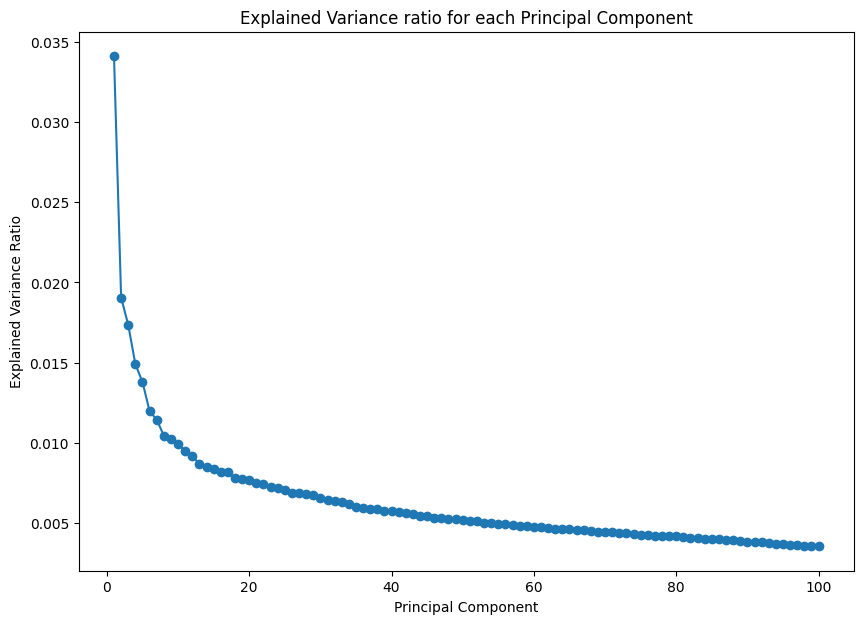

In [26]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance ratio for each Principal Component')